Step 1 — Install Required Libraries

In [1]:
!pip install numpy pandas scikit-learn tensorflow matplotlib seaborn


Step 2 — Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from google.colab import drive   # ✅ FIXED import

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 3 — Load Dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ANN/3/Assignment_1/Churn_Modelling.csv")  # ✅ Correct Colab path
print("Column names in dataset:")
print(df.columns)

Column names in dataset:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Step 4 — Select Features & Target

In [6]:
X = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = df["Exited"]


Step 5 — One-Hot Encode Categorical Columns

In [7]:
categorical_features = ["Geography", "Gender"]

ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

X = ct.fit_transform(X)


Step 6 — Train–Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Step 7 — Feature Scaling

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 8 — Build the ANN Model

In [10]:
model = Sequential()

# Input Layer
model.add(Input(shape=(X_train.shape[1],)))

# Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output Layer (Binary Classification)
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Step 9 — Train the ANN

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5684 - loss: 0.6833 - val_accuracy: 0.8000 - val_loss: 0.4635
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7996 - loss: 0.4536 - val_accuracy: 0.8169 - val_loss: 0.4283
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8124 - loss: 0.4310 - val_accuracy: 0.8313 - val_loss: 0.4112
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8236 - loss: 0.4141 - val_accuracy: 0.8425 - val_loss: 0.3943
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8409 - loss: 0.3814 - val_accuracy: 0.8469 - val_loss: 0.3791
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8539 - loss: 0.3654 - val_accuracy: 0.8475 - val_loss: 0.3700
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.3623 - val_accuracy: 0.8456 - val_loss: 0.3627
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.3574 - val_accuracy:

Step 10 — Model Evaluation

1. Predict

In [12]:
y_pred = (model.predict(X_test) > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2. Accuracy

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8595


3. Classification Report

In [14]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.50      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



4. Confusion Matrix

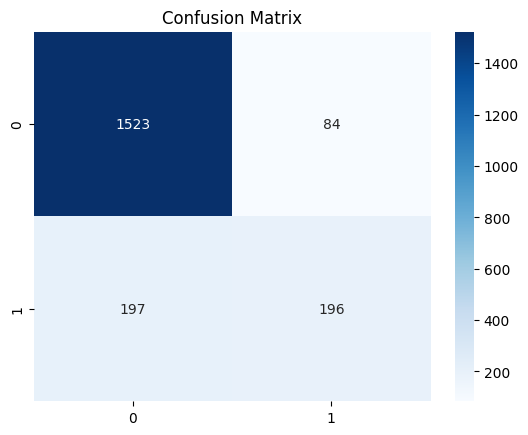

In [15]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
